### Count-Vectorizer basic example

Author: Dr. Hickman 

In [1]:
### IMPORT PACKAGES 
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np


In [2]:
### DEFINE A TOY CORPUS 
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one, test, test, test',
    'Is this the first document? test test',
]


In [3]:
# INITIALIZE COUNT VECTORIZER
vectorizer=CountVectorizer()   


In [4]:
# RUN COUNT VECTORIZER ON OUR COURPUS 
Xs  =  vectorizer.fit_transform(corpus)   
print(type(Xs))

<class 'scipy.sparse._csr.csr_matrix'>


In [5]:
### EXPLORE THE OBJECT ATTRIBUTES 

# VOCABULARY DICTIONARY
print("vocabulary = ",vectorizer.vocabulary_)   

# STOP WORDS 
print("stop words =", vectorizer.stop_words)

# col_names
col_names=vectorizer.get_feature_names_out()
print("col_names=",col_names)


vocabulary =  {'this': 9, 'is': 3, 'the': 7, 'first': 2, 'document': 1, 'second': 5, 'and': 0, 'third': 8, 'one': 4, 'test': 6}
stop words = None
col_names= ['and' 'document' 'first' 'is' 'one' 'second' 'test' 'the' 'third' 'this']


In [6]:
# X  =  vectorizer.fit_transform(corpus)   --> returns a SPARSE document term frequency matrix
print("SPARSE MATRIX\n",Xs)

SPARSE MATRIX
   (0, 9)	1
  (0, 3)	1
  (0, 7)	1
  (0, 2)	1
  (0, 1)	1
  (1, 9)	1
  (1, 3)	1
  (1, 7)	1
  (1, 1)	2
  (1, 5)	1
  (2, 9)	1
  (2, 3)	1
  (2, 7)	1
  (2, 0)	1
  (2, 8)	1
  (2, 4)	1
  (2, 6)	3
  (3, 9)	1
  (3, 3)	1
  (3, 7)	1
  (3, 2)	1
  (3, 1)	1
  (3, 6)	2


In [7]:
#CONVERT TO DENSE MATRIX
X=np.array(Xs.todense())
print("CORPUS=",corpus)
print("COLUMN NAMES=",col_names)
print("DOCUMENT WORD COUNTS")
print("SPARSE MATRIX\n",X)                        


CORPUS= ['This is the first document.', 'This document is the second document.', 'And this is the third one, test, test, test', 'Is this the first document? test test']
COLUMN NAMES= ['and' 'document' 'first' 'is' 'one' 'second' 'test' 'the' 'third' 'this']
DOCUMENT WORD COUNTS
SPARSE MATRIX
 [[0 1 1 1 0 0 0 1 0 1]
 [0 2 0 1 0 1 0 1 0 1]
 [1 0 0 1 1 0 3 1 1 1]
 [0 1 1 1 0 0 2 1 0 1]]


In [8]:
print("COLUMN NAMES=",col_names)
print("CORPUS WIDE WORD COUNTS:",np.sum(X,axis=0))
print("WORDS PER DOCUMENT:\n",np.sum(X,axis=1))

COLUMN NAMES= ['and' 'document' 'first' 'is' 'one' 'second' 'test' 'the' 'third' 'this']
CORPUS WIDE WORD COUNTS: [1 4 2 4 1 1 5 4 1 4]
WORDS PER DOCUMENT:
 [5 6 9 7]


In [9]:
#CONVERT DOCUMENT TERM FREQUENCY TO ONE HOT ENCODED VECTORS
maxs=np.max(X,axis=0)
ONE_HOT_ENCODED=np.ceil(X/maxs)
print("MAX COUNT:",maxs)
print("ONE_HOT_ENCODED")
print(ONE_HOT_ENCODED)

MAX COUNT: [1 2 1 1 1 1 3 1 1 1]
ONE_HOT_ENCODED
[[0. 1. 1. 1. 0. 0. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 0. 1. 1. 0. 1. 1. 1. 1.]
 [0. 1. 1. 1. 0. 0. 1. 1. 0. 1.]]


In [10]:
#------------------------
# #COMPUTE PAIRWISE DISTANCES BETWEEN DOCUMENTS 
#------------------------

print("--------------------------------------------")
#LOOP OVER ROWS (DOCUMENTS)
for i in range(0,X.shape[0]):
    # for j in range(i+1,len(X)):
    for j in range(i,X.shape[0]):
        print("DOC-i=",i,"DOC-j=",j); #print(X[i,:]); print(X[j,:])
        print("     CARTESIAN:",(np.sum((X[i,:]-X[j,:])**2.0)**0.5))

        #CARTESIAN DISTANCE
        CS=np.dot(X[i,:],X[j,:])/np.linalg.norm(X[i,:])/np.linalg.norm(X[j,:])
        print("     COSINE SIMILARITY:",CS)
        print("     COSINE DISTANCE:",1.0-CS)
print("--------------------------------------------")


--------------------------------------------
DOC-i= 0 DOC-j= 0
     CARTESIAN: 0.0
     COSINE SIMILARITY: 1.0
     COSINE DISTANCE: 0.0
DOC-i= 0 DOC-j= 1
     CARTESIAN: 1.7320508075688772
     COSINE SIMILARITY: 0.7905694150420948
     COSINE DISTANCE: 0.20943058495790523
DOC-i= 0 DOC-j= 2
     CARTESIAN: 3.7416573867739413
     COSINE SIMILARITY: 0.34641016151377546
     COSINE DISTANCE: 0.6535898384862245
DOC-i= 0 DOC-j= 3
     CARTESIAN: 2.0
     COSINE SIMILARITY: 0.7453559924999299
     COSINE DISTANCE: 0.2546440075000701
DOC-i= 1 DOC-j= 1
     CARTESIAN: 0.0
     COSINE SIMILARITY: 0.9999999999999999
     COSINE DISTANCE: 1.1102230246251565e-16
DOC-i= 1 DOC-j= 2
     CARTESIAN: 4.123105625617661
     COSINE SIMILARITY: 0.27386127875258304
     COSINE DISTANCE: 0.726138721247417
DOC-i= 1 DOC-j= 3
     CARTESIAN: 2.6457513110645907
     COSINE SIMILARITY: 0.5892556509887895
     COSINE DISTANCE: 0.4107443490112105
DOC-i= 2 DOC-j= 2
     CARTESIAN: 0.0
     COSINE SIMILARITY: 0.99

            and  document     first        is       one        second  \
0  5.304672e-06  1.000008  1.000002  1.000007  0.000005  5.138027e-06   
1  6.782942e-06  2.000008  0.000010  1.000005  0.000005  1.000006e+00   
2  1.000006e+00  0.000009  0.000005  1.000008  1.000003  5.633884e-06   
3  8.823478e-09  1.000007  1.000005  1.000004  0.000009  9.216300e-07   

       test       the     third      this  
0  0.000002  1.000001  0.000003  1.000009  
1  0.000007  1.000001  0.000006  1.000009  
2  3.000008  1.000006  1.000005  1.000004  
3  2.000009  1.000005  0.000003  1.000010  
                and  document     first        is       one        second  \
count  4.000000e+00  4.000000  4.000000  4.000000  4.000000  4.000000e+00   
mean   2.500045e-01  1.000008  0.500005  1.000006  0.250006  2.500043e-01   
std    5.000010e-01  0.816496  0.577348  0.000002  0.499999  5.000009e-01   
min    8.823478e-09  0.000009  0.000005  1.000004  0.000005  9.216300e-07   
25%    3.980710e-06  0.750007

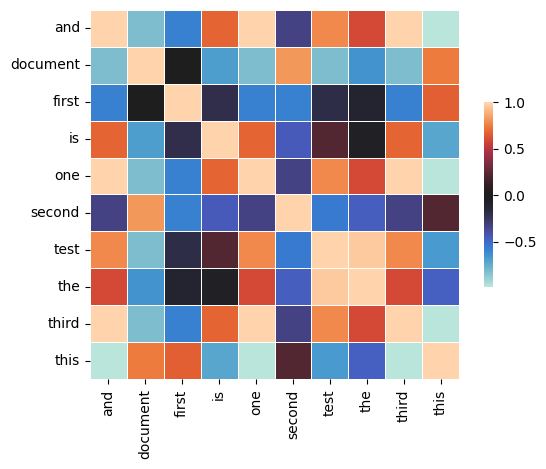

In [11]:

#------------------------
#PANDAS AND SEABORN STUFF
#------------------------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

noise=np.random.uniform(0,0.00001,X.shape) 

df=pd.DataFrame(noise+X, columns=col_names)
#REORDER FROM MOST FREQUENT WORD IN CORPUS TO LEAST
# MAX_WORD=min(len(SORTED_COL_NAME),5)
# df=df[SORTED_COL_NAME[0:MAX_WORD]]
print(df)

print(df.describe())
corr=df.corr()
print("CORR=",corr)

# sns.pairplot(df, diag_kind='kde', kind="hist")  # SLOWER
# plt.show()

# # Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()